# 소개 (Introduction)


<center><img src=https://i.imgur.com/sX3K62b.png></center>

2015년 1월 1일부터 [*The Washington Post*](https://www.washingtonpost.com/)는 미국 내 경찰이 공무 수행 중 발생한 모든 총기 사망 사건을 데이터베이스화하고 있습니다.


데이터 수집 및 보고와 관련하여 많은 어려움이 있지만, *The Washington Post*는 각 사건에 대한 12개 이상의 정보를 추적해왔습니다.
이 정보에는 희생자의 **인종, 연령, 성별**, 무장 여부, 정신 건강 상태 등이 포함됩니다.

이 데이터는 **법 집행 기관 웹사이트, 지역 뉴스, 소셜 미디어** 및
*"Killed by Police"*, *"Fatal Encounters"* 와 같은 독립적인 데이터베이스를 모니터링하여 수집되었습니다.
또한 *The Washington Post*는 여러 사건에 대해 추가적인 취재를 진행하였습니다.

추가적으로, 4개의 **미국 인구 조사 데이터셋**이 포함되어 있습니다:
- 빈곤율 (Poverty rate)
- 고등학교 졸업률 (High school graduation rate)
- 중위 가계 소득 (Median household income)
- 인종 통계 (Racial demographics)

데이터 출처: [미국 인구조사 데이터](https://www.census.gov)


# Plotly 업그레이드

Google Colab을 사용하고 있다면, 아래의 셀을 실행하여 최신 버전의 Plotly를 설치하세요.


In [96]:
# pip Upgrade
!python -m pip install --upgrade pip
# plotly Upgrade
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import 목록

In [150]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# This might be helpful:
from collections import Counter

## Notebook Presentation (데이터 가독성 향상을 위한 설정 변경)

In [98]:
#pandas의 float 숫자 표시 형식을 변경합니다.
# 소수점 둘째 자리까지 표시 (.2f)
# 숫자에 천 단위 구분 기호(쉼표 ,) 추가
pd.options.display.float_format = '{:,.2f}'.format

## Data 로드 하기

In [99]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# 데이터 탐색 (Preliminary Data Exploration)

- 데이터프레임의 **형태(shape)** 는 어떻게 되는가?
- **행과 열의 개수** 는 몇 개인가?
- **컬럼(열) 이름** 은 무엇인가?
- **결측치(NaN) 또는 중복 데이터** 가 존재하는가?


In [100]:
print("DATA SHAPE")
print(f"Median_Household_Income_2015: {df_hh_income.shape}")
print(f"Pct_People_Below_Poverty_Level: {df_pct_poverty.shape}")
print(f"Pct_Over_25_Completed_High_School: {df_pct_completed_hs.shape}")
print(f"Share_of_Race_By_City: {df_share_race_city.shape}")
print(f"Deaths_by_Police_US: {df_fatalities.shape}")

DATA SHAPE
Median_Household_Income_2015: (29322, 3)
Pct_People_Below_Poverty_Level: (29329, 3)
Pct_Over_25_Completed_High_School: (29329, 3)
Share_of_Race_By_City: (29268, 7)
Deaths_by_Police_US: (2535, 14)


In [101]:
print("COLUMNS NAME")
print(f"Median_Household_Income_2015: {df_hh_income.columns}")
print(f"Pct_People_Below_Poverty_Level: {df_pct_poverty.columns}")
print(f"Pct_Over_25_Completed_High_School: {df_pct_completed_hs.columns}")
print(f"Share_of_Race_By_City: {df_share_race_city.columns}")
print(f"Deaths_by_Police_US: {df_fatalities.columns}")

COLUMNS NAME
Median_Household_Income_2015: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Pct_People_Below_Poverty_Level: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Pct_Over_25_Completed_High_School: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Share_of_Race_By_City: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Deaths_by_Police_US: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [102]:
print("NAN values: TRUE: NaN 있음, FALSE: NaN 없음")
print(f"Median_Household_Income_2015: {df_hh_income.isna().values.any()}")
print(f"Pct_People_Below_Poverty_Level: {df_pct_poverty.isna().values.any()}")
print(f"Pct_Over_25_Completed_High_School: {df_pct_completed_hs.isna().values.any()}")
print(f"Share_of_Race_By_City: {df_share_race_city.isna().values.any()}")
print(f"Deaths_by_Police_US: {df_fatalities.isna().values.any()}")

NAN values: TRUE: NaN 있음, FALSE: NaN 없음
Median_Household_Income_2015: True
Pct_People_Below_Poverty_Level: False
Pct_Over_25_Completed_High_School: False
Share_of_Race_By_City: False
Deaths_by_Police_US: True


# 데이터 정리 - 결측값 및 중복 데이터 확인

결측값(NaN)을 어떻게 처리할지 고려하세요.
경우에 따라 **0으로 대체(substituting 0)** 하는 것이 적절할 수도 있습니다.


In [103]:
print("NAN값이 있는 열을 확인")
Median_Household_Income_2015_nan_columns = df_hh_income.columns[df_hh_income.isnull().any()]
print(f"Median_Household_Income_2015: {Median_Household_Income_2015_nan_columns}")
Pct_People_Below_Poverty_Level_nan_columns = df_pct_poverty.columns[df_pct_poverty.isnull().any()]
print(f"Pct_People_Below_Poverty_Level: {Pct_People_Below_Poverty_Level_nan_columns}")
Pct_Over_25_Completed_High_School_nan_columns = df_pct_completed_hs.columns[df_pct_completed_hs.isnull().any()]
print(f"Pct_Over_25_Completed_High_School: {Pct_Over_25_Completed_High_School_nan_columns}")
Share_of_Race_By_City_nan_columns = df_share_race_city.columns[df_share_race_city.isnull().any()]
print(f"Share_of_Race_By_City: {Share_of_Race_By_City_nan_columns}")
Deaths_by_Police_US_nan_columns = df_fatalities.columns[df_fatalities.isnull().any()]
print(f"Deaths_by_Police_US: {Deaths_by_Police_US_nan_columns}")

NAN값이 있는 열을 확인
Median_Household_Income_2015: Index(['Median Income'], dtype='object')
Pct_People_Below_Poverty_Level: Index([], dtype='object')
Pct_Over_25_Completed_High_School: Index([], dtype='object')
Share_of_Race_By_City: Index([], dtype='object')
Deaths_by_Police_US: Index(['armed', 'age', 'race', 'flee'], dtype='object')


In [104]:
print("NaN값 처리")

# 수치형 변수 처리 (문자열을 숫자로 변환 후 0으로 채우기)
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"], errors='coerce')
df_hh_income.loc[:, "Median Income"].fillna(0)

df_fatalities["age"] = pd.to_numeric(df_fatalities["age"], errors='coerce')
df_fatalities.loc[:, "age"].fillna(0)

# 범주형 변수 unknown, Not fleeing
df_fatalities.loc[:, "race"] = df_fatalities["race"].fillna("unKnown")
df_fatalities.loc[:, "armed"] = df_fatalities["armed"].fillna("unKnown")
df_fatalities.loc[:, "flee"] = df_fatalities["flee"].fillna("Not fleeing")

print("디버깅 용")
print(f"Median_Household_Income_2015 Check: {df_hh_income.isna().values.any()}")
print(f"Deaths_by_Police_US Check: {df_fatalities.isna().values.any()}")

NaN값 처리
디버깅 용
Median_Household_Income_2015 Check: True
Deaths_by_Police_US Check: True


# 미국 각 주의 빈곤율 차트

미국 각 주(State)의 빈곤율을 **높은 순에서 낮은 순으로 정렬한 막대 그래프(Bar Chart)** 를 생성하세요.
어느 주가 가장 높은 빈곤율을 가지고 있는가?
어느 주가 가장 낮은 빈곤율을 가지고 있는가?


In [105]:
# 빈곤율이 높은 주에서 낮은 주로 정렬된 막대 그래프 그리기

## 주별 평균 빈곤율
### 문자열 숫자열로 변경
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")
### 주별 평균 빈곤율 계산
state_poverty = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()
state_poverty = state_poverty.sort_values(by="poverty_rate", ascending=False)
print(f"빈곤율 정렬 {state_poverty}")



빈곤율 정렬    Geographic Area  poverty_rate
25              MS         26.88
3               AZ         25.67
10              GA         23.78
32              NM         23.08
2               AR         22.96
18              LA         22.34
40              SC         22.16
49              WV         21.13
36              OK         20.66
1               AL         20.65
24              MO         20.11
17              KY         20.08
43              TX         19.92
42              TN         19.89
0               AK         19.85
27              NC         19.75
13              ID         18.24
7               DC         18.00
22              MI         17.90
9               FL         17.57
4               CA         17.12
21              ME         16.89
37              OR         16.52
26              MT         16.51
41              SD         16.03
15              IN         15.50
47              WA         15.02
35              OH         14.85
16              KS         14.76
45 

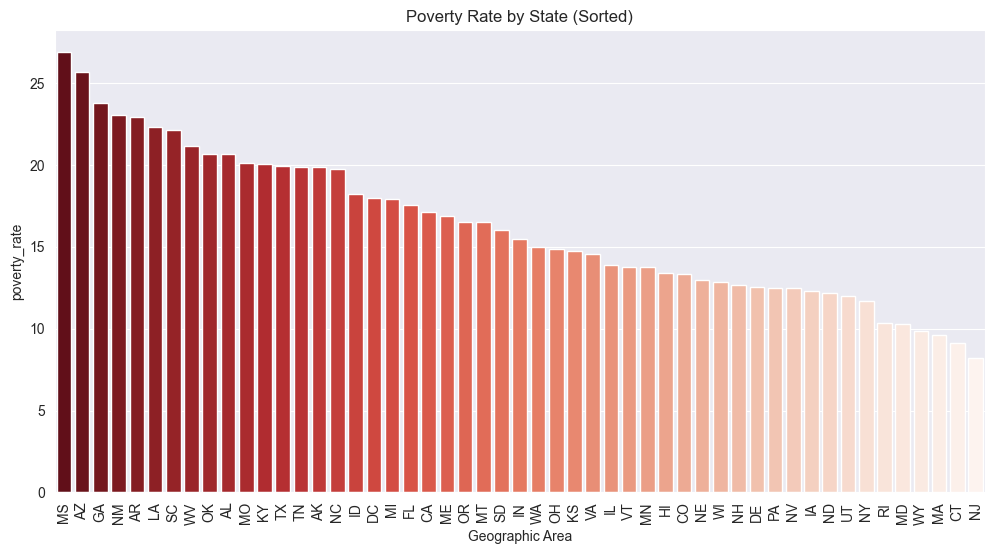

In [106]:
### 막대 그래프 시각화
# 그래프 크기 설정 (가로 12, 세로 6)
plt.figure(figsize=(12, 6))

# 막대 그래프 (barplot) 생성
sns.barplot(
    data=state_poverty,  # 데이터프레임 지정
    x="Geographic Area",  # x축: 주 (State)
    y="poverty_rate",  # y축: 빈곤율 (Poverty Rate)
    hue="Geographic Area",  # 색상을 주별로 구분
    palette="Reds_r",  # 색상 팔레트 (빨간색 계열, 역순)
    legend=False  # 범례 숨기기
)

# x축 레이블을 90도 회전하여 가독성 향상
plt.xticks(rotation=90)

# 그래프 제목 추가
plt.title("Poverty Rate by State (Sorted)")

# 그래프 출력
plt.show()

# 미국 각 주의 고등학교 졸업률 차트

미국 각 주(State)의 **고등학교 졸업률**을 **오름차순(낮은 순부터 높은 순으로) 정렬한 차트**를 생성하세요.
어느 주의 **고등학교 졸업률이 가장 낮은가?**
어느 주의 **고등학교 졸업률이 가장 높은가?**


각 주의 고등학교 졸업률    Geographic Area  percent_completed_hs
43              TX                 75.69
25              MS                 78.47
10              GA                 79.01
18              LA                 79.29
2               AR                 79.95
1               AL                 80.30
3               AZ                 80.47
40              SC                 80.85
32              NM                 80.98
42              TN                 81.63
4               CA                 81.96
49              WV                 82.35
17              KY                 82.37
36              OK                 82.91
27              NC                 83.25
24              MO                 83.52
0               AK                 84.63
45              VA                 84.88
13              ID                 85.17
9               FL                 85.74
15              IN                 86.32
33              NV                 87.72
41              SD                 87.75
28

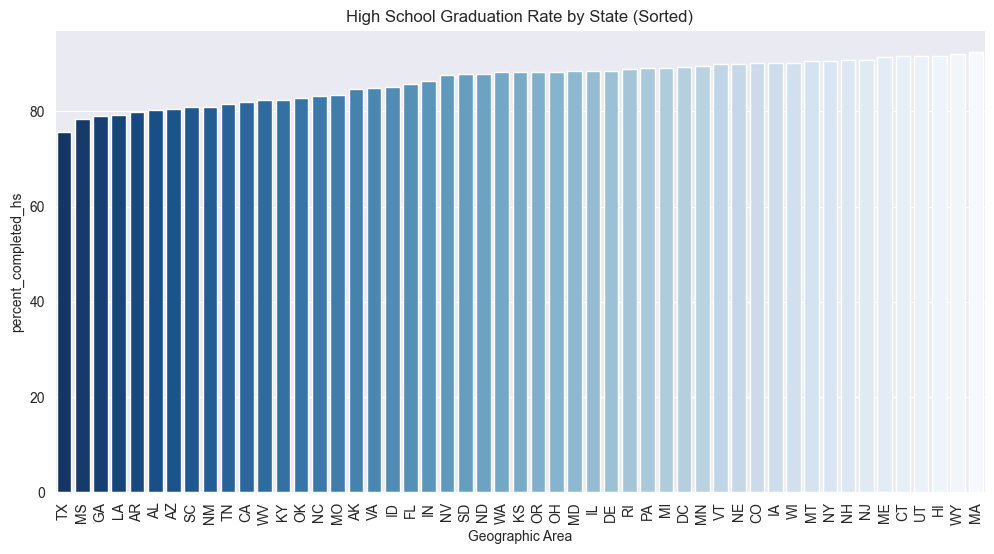

In [107]:
# 미국 각 주의 고등학교 졸업률을 오름차순으로 정렬

### 문자열 숫자열로 변경
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")
### 주별 평균 고등학교 졸업률
hs_completed = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()
hs_completed = hs_completed.sort_values(by="percent_completed_hs", ascending=True)
print(f"각 주의 고등학교 졸업률 {hs_completed}")

### 막대 그래프 시각화
# 그래프 크기 설정 (가로 12, 세로 6)
plt.figure(figsize=(12, 6))

# 막대 그래프 (barplot) 생성
sns.barplot(
    data=hs_completed,  # 데이터프레임 지정
    x="Geographic Area",  # x축: 주 (State)
    y="percent_completed_hs",  # y축: 빈곤율 (Poverty Rate)
    hue="Geographic Area",  # 색상을 주별로 구분
    palette="Blues_r",  # 색상 팔레트 (빨간색 계열, 역순)
    legend=False  # 범례 숨기기
)

# x축 레이블을 90도 회전하여 가독성 향상
plt.xticks(rotation=90)

# 그래프 제목 추가
plt.title("High School Graduation Rate by State (Sorted)")

# 그래프 출력
plt.show()

# 빈곤율과 고등학교 졸업률 간의 관계 시각화

두 개의 **y축(y-axes)** 을 가진 **선형 차트(Line Chart)** 를 생성하여
빈곤율과 고등학교 졸업률이 함께 변하는지 확인

In [108]:
# 빈곤율과 고등학교 졸업률 간의 관계 분석
## 빈곤율이 높은 주에서 고등학교 졸업률이 낮은 경향이 있는지 확인
## 빈곤율과 고등학교 졸업률이 함께 증가하거나 감소하는 패턴 찾기

### 데이터 병합
merged_data = pd.merge(state_poverty, hs_completed, on="Geographic Area")

### 빈곤율이 높은 순서로 정렬
merged_data = merged_data.sort_values(by="poverty_rate", ascending=False)

### 결과 확인
print(merged_data)

   Geographic Area  poverty_rate  percent_completed_hs
0               MS         26.88                 78.47
1               AZ         25.67                 80.47
2               GA         23.78                 79.01
3               NM         23.08                 80.98
4               AR         22.96                 79.95
5               LA         22.34                 79.29
6               SC         22.16                 80.85
7               WV         21.13                 82.35
8               OK         20.66                 82.91
9               AL         20.65                 80.30
10              MO         20.11                 83.52
11              KY         20.08                 82.37
12              TX         19.92                 75.69
13              TN         19.89                 81.63
14              AK         19.85                 84.63
15              NC         19.75                 83.25
16              ID         18.24                 85.17
17        

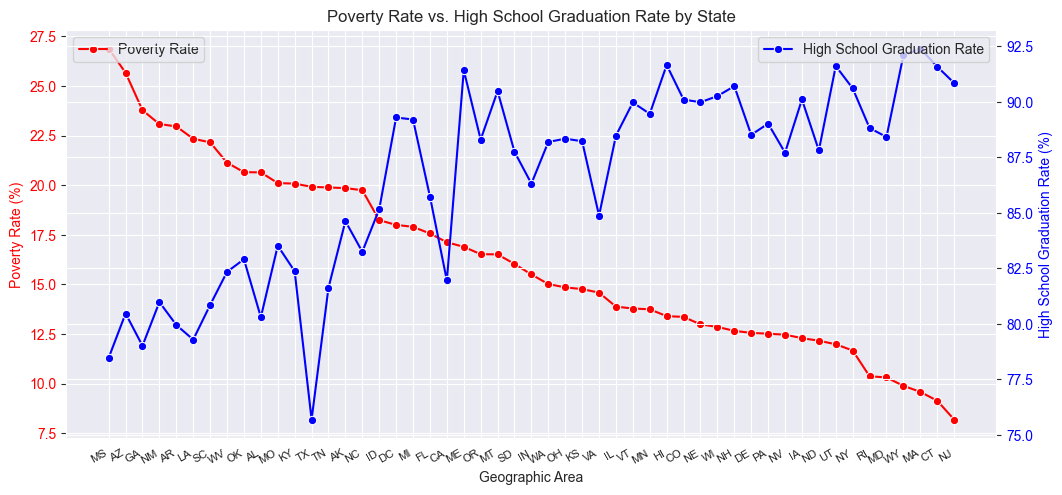

In [109]:
# 그래프 크기 설정: 전체 그래프의 크기를 (12, 6)으로 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축: 빈곤율(Poverty Rate)을 나타내는 빨간색 선 그래프 생성
sns.lineplot(
    data=merged_data,  # 시각화할 데이터프레임
    x="Geographic Area",  # x축: 각 주(State)
    y="poverty_rate",  # y축: 빈곤율 (Poverty Rate)
    marker="o",  # 데이터 포인트를 동그라미 마커로 표시
    color="red",  # 그래프 색상을 빨간색으로 설정
    label="Poverty Rate"  # 범례에 표시될 라벨
)

# 첫 번째 y축 속성 설정
ax1.set_ylabel("Poverty Rate (%)", color="red")  # y축 레이블을 'Poverty Rate (%)'로 설정하고 빨간색 지정
ax1.tick_params(axis="y", labelcolor="red")  # y축 눈금(label)의 색상을 빨간색으로 설정

# 두 번째 y축: 고등학교 졸업률(High School Graduation Rate) 표시
ax2 = ax1.twinx()  # 동일한 x축을 공유하는 두 번째 y축 생성 (트윈 축)

sns.lineplot(
    data=merged_data,  # 시각화할 데이터프레임
    x="Geographic Area",  # x축: 각 주(State)
    y="percent_completed_hs",  # y축: 고등학교 졸업률 (High School Graduation Rate)
    marker="o",  # 데이터 포인트를 동그라미 마커로 표시
    color="blue",  # 그래프 색상을 파란색으로 설정
    label="High School Graduation Rate"  # 범례에 표시될 라벨
)

# 두 번째 y축 속성 설정
ax2.set_ylabel("High School Graduation Rate (%)", color="blue")  # y축 레이블을 'High School Graduation Rate (%)'로 설정하고 파란색 지정
ax2.tick_params(axis="y", labelcolor="blue")  # y축 눈금(label)의 색상을 파란색으로 설정

# x축 레이블 설정: 데이터 개수에 맞게 모든 주를 표시
xtick_positions = np.arange(0, len(merged_data), step=1)  # x축 눈금 위치를 1씩 증가하도록 설정
ax1.set_xticks(xtick_positions)  # x축 눈금 위치 적용
ax1.set_xticklabels(merged_data["Geographic Area"].iloc[xtick_positions], rotation=90, fontsize=8)  # x축 레이블 설정 및 90도 회전

# 하단 여백 확보: x축 레이블이 겹치지 않도록 여백을 증가
plt.subplots_adjust(bottom=0.5)  # 하단 여백을 0.5로 설정하여 레이블 간격 확보

# 그래프 제목 추가
plt.title("Poverty Rate vs. High School Graduation Rate by State")  # 그래프 제목 설정

# 범례 추가: 그래프의 설명을 왼쪽 위, 오른쪽 위에 각각 표시
ax1.legend(loc="upper left")  # 첫 번째 y축(빈곤율)의 범례는 왼쪽 위에 배치
ax2.legend(loc="upper right")  # 두 번째 y축(졸업률)의 범례는 오른쪽 위에 배치

# x축 레이블 자동 정렬: 레이블이 겹칠 경우 자동으로 정렬하여 가독성 향상
fig.autofmt_xdate()

# 그래프 출력
plt.show()

**Seaborn의 `jointplot()`** 을 활용하여
**커널 밀도 추정(KDE, Kernel Density Estimate) 및/또는 산점도(Scatter Plot)** 를 사용해 동일한 관계를 시각화

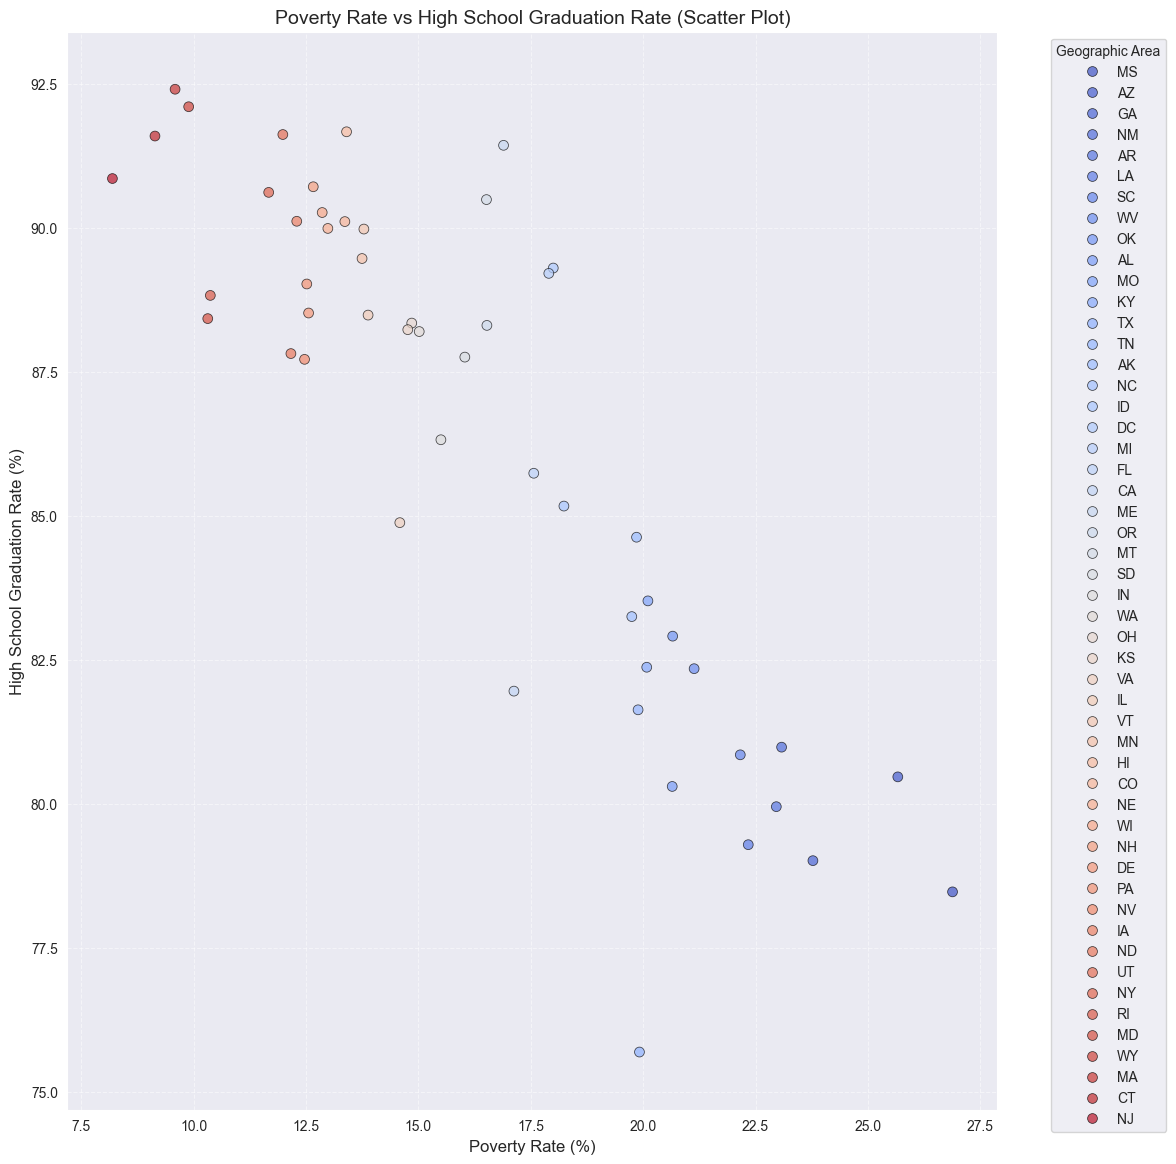

In [110]:
# 산점도(Scatter Plot) 및 커널 밀도 추정(KDE, Kernel Density Estimate) 를 통해 빈곤율과 졸업률 간의 관계를 직관적으로 파악
# 상관관계(연관성이 높거나 낮음)를 시각적으로 확인

# 그래프 크기 설정
plt.figure(figsize=(12, 14))

# 산점도 (Scatter Plot) 생성
scatter = sns.scatterplot(
    data=merged_data,   # 데이터셋 지정
    x="poverty_rate",   # x축: 빈곤율
    y="percent_completed_hs",  # y축: 고등학교 졸업률
    hue="Geographic Area",  # 색상 그룹 지정 (주별)
    palette="coolwarm",  # 색상 팔레트 변경
    alpha=0.7,  # 투명도 적용 (겹치는 점들이 보이도록)
    edgecolor="black",  # 점 테두리 색 추가
    s=50  # 점 크기 조절
)

# 그래프 제목 설정
plt.title("Poverty Rate vs High School Graduation Rate (Scatter Plot)", fontsize=14)

# x, y축 레이블 설정
plt.xlabel("Poverty Rate (%)", fontsize=12)
plt.ylabel("High School Graduation Rate (%)", fontsize=12)

# x축과 y축의 범위 조절
plt.xlim(merged_data["poverty_rate"].min() - 1, merged_data["poverty_rate"].max() + 1)
plt.ylim(merged_data["percent_completed_hs"].min() - 1, merged_data["percent_completed_hs"].max() + 1)

# 범례 위치 조정 (그래프 외부에 배치)
plt.legend(title="Geographic Area", bbox_to_anchor=(1.05, 1), loc='upper left')

# 격자 추가
plt.grid(True, linestyle="--", alpha=0.5)

# 그래프 출력
plt.show()

Seaborn의 **`.lmplot()`** 또는 **`.regplot()`** 을 활용하여
빈곤율과 고등학교 졸업률 간의 **선형 회귀 분석(Linear Regression)** 을 수행

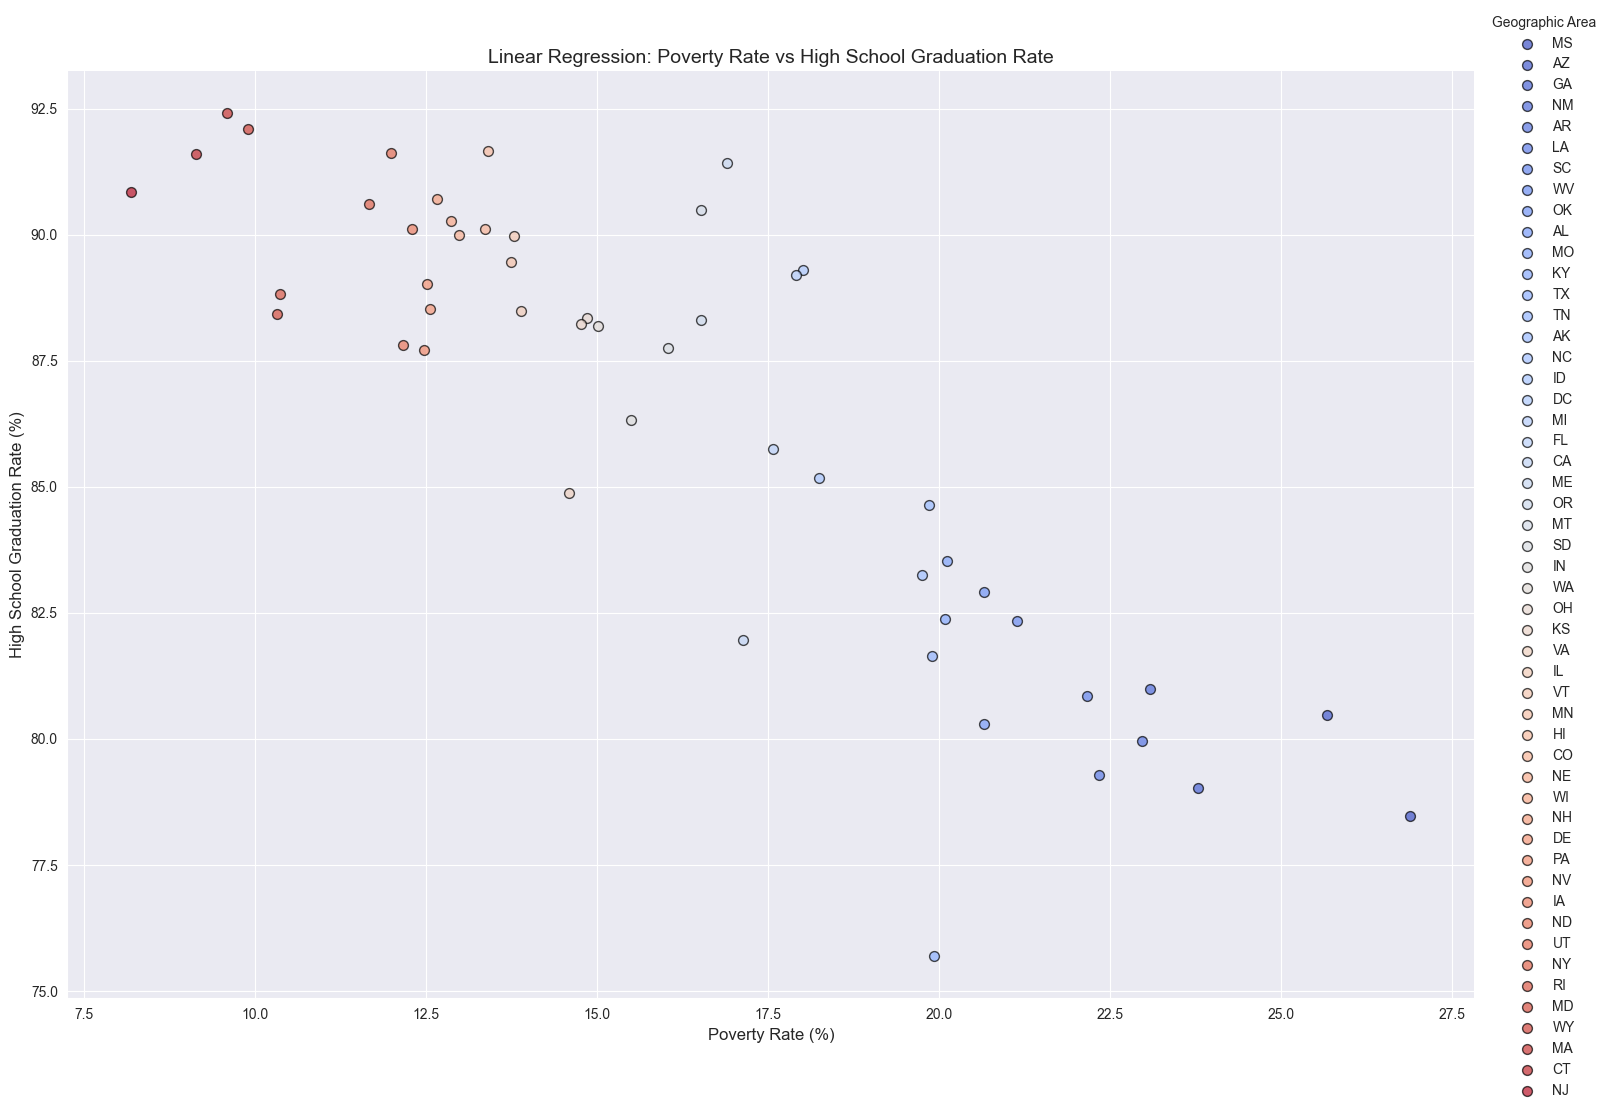

In [111]:
# 빈곤율과 졸업률 간의 선형 관계를 수치적으로 분석하고 회귀선을 도출
# lmplot()은 그룹별 시각화가 가능하고, regplot()은 단순 선형 회귀만 표시 가능


sns.lmplot(
    data=merged_data,  # 데이터셋 지정
    x="poverty_rate",  # x축: 빈곤율
    y="percent_completed_hs",  # y축: 고등학교 졸업률
    hue="Geographic Area",  # 주별 그룹화 (각 주별 선형 회귀선 제공)
    palette="coolwarm",  # 색상 팔레트 변경 (시각적 구분 강조)
    aspect=1.5,  # 가로-세로 비율 조정 (기본값 1, 숫자가 클수록 가로로 확장)
    height=10,  # 그래프 크기 설정 (기본값: 5)
    scatter_kws={'s': 50, 'alpha': 0.7, 'edgecolor': 'black'},  # 산점도 옵션 설정
    line_kws={'linewidth': 2}  # 회귀선 선 두께 설정
)

# 그래프 제목 추가
plt.title("Linear Regression: Poverty Rate vs High School Graduation Rate", fontsize=14)

# x축, y축 레이블 설정
plt.xlabel("Poverty Rate (%)", fontsize=12)
plt.ylabel("High School Graduation Rate (%)", fontsize=12)

# 그래프 출력
plt.show()

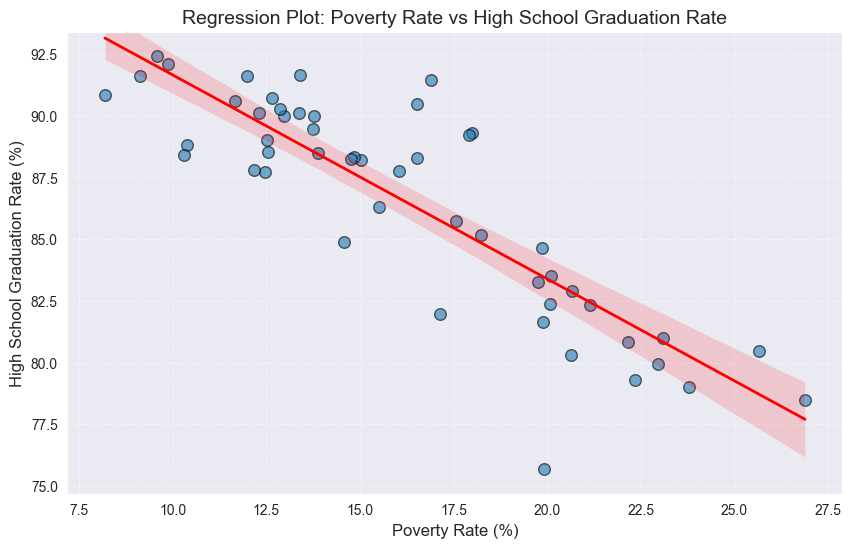

In [112]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))  # 가로 10, 세로 6 크기로 조정

# 빈곤율과 졸업률 간의 선형 회귀 분석 시각화 (전체적인 관계 파악)
sns.regplot(
    data=merged_data,  # 데이터셋 지정
    x="poverty_rate",  # x축: 빈곤율
    y="percent_completed_hs",  # y축: 고등학교 졸업률
    scatter_kws={"s": 70, "alpha": 0.6, "edgecolor": "black"},  # 산점도 설정 (점 크기, 투명도, 테두리 추가)
    line_kws={"color": "red", "linewidth": 2},  # 회귀선 설정 (빨간색, 두께 2)
)

# 그래프 제목 추가
plt.title("Regression Plot: Poverty Rate vs High School Graduation Rate", fontsize=14)

# x축, y축 레이블 추가
plt.xlabel("Poverty Rate (%)", fontsize=12)
plt.ylabel("High School Graduation Rate (%)", fontsize=12)

# x축과 y축의 범위 조절 (최소, 최대값보다 살짝 여유 공간 추가)
plt.xlim(merged_data["poverty_rate"].min() - 1, merged_data["poverty_rate"].max() + 1)
plt.ylim(merged_data["percent_completed_hs"].min() - 1, merged_data["percent_completed_hs"].max() + 1)

# 격자 추가 (가독성 향상)
plt.grid(True, linestyle="--", alpha=0.5)

# 그래프 출력
plt.show()

# 각 미국 주의 인종 구성 비율을 나타내는 막대 차트 생성

- 각 미국 주(State)별 **백인, 흑인, 히스패닉, 아시아인 및 원주민(Native American) 인구 비율**을
- **하위 섹션(subsections)** 이 포함된 **막대 그래프(Bar Chart)** 를 사용하여 시각화

In [113]:
# 주별 인종 구성 비율 데이터 선택
race_columns = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]

# 문자열을 숫자로 변환 (errors='coerce' 사용하여 변환 불가 값은 NaN 처리)
for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors="coerce")

# 주별 평균 인종 구성 비율 계산
df_state_race = df_share_race_city.groupby("Geographic area")[race_columns].mean().reset_index()
# 변환된 데이터 확인
print(df_state_race.info())  # 데이터 타입 확인
print(df_state_race.head())  # 상위 5개 행 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        51 non-null     object 
 1   share_white            51 non-null     float64
 2   share_black            51 non-null     float64
 3   share_native_american  51 non-null     float64
 4   share_asian            51 non-null     float64
 5   share_hispanic         51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB
None
  Geographic area  share_white  share_black  share_native_american  \
0              AK        45.65         0.57                  45.86   
1              AL        72.51        23.32                   0.66   
2              AR        78.45        16.30                   0.76   
3              AZ        59.93         0.95                  28.59   
4              CA        71.87         2.69                   1.72   

   s

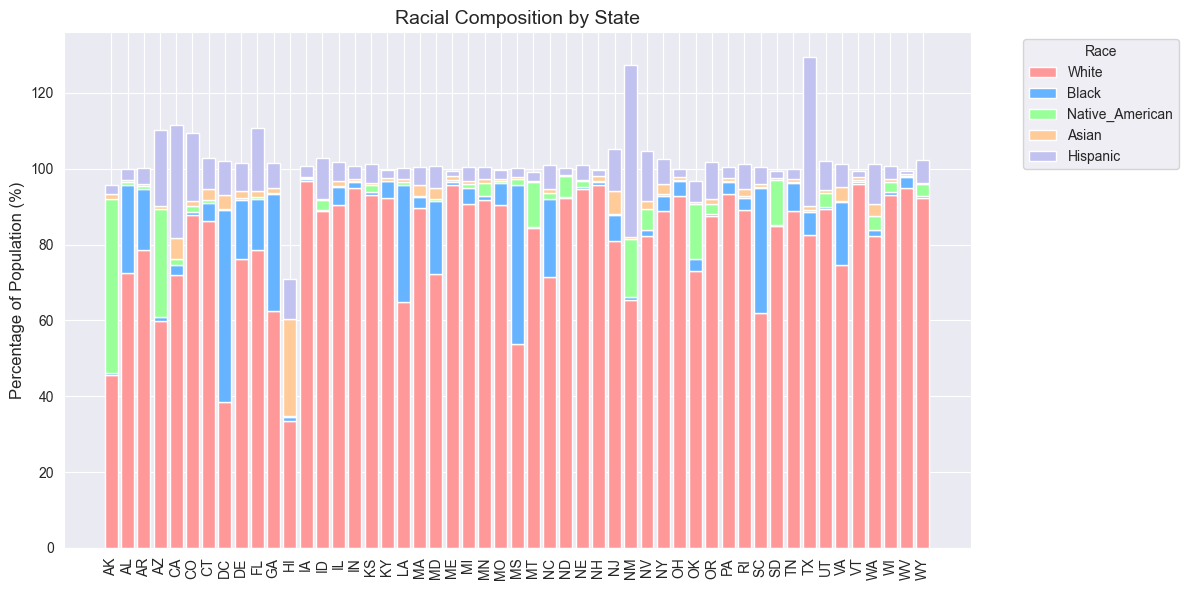

In [114]:
# 색상 팔레트 설정
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]

# Stacked Bar Chart 생성
fig, ax = plt.subplots(figsize=(12, 6))  # 그래프 크기 설정

# 누적 막대 그래프 생성
## bottom_values 리스트는 각 주의 누적된 인종 비율을 저장
bottom_values = [0] * len(df_state_race)  # 초기 누적 값 (0으로 설정)
for idx, race in enumerate(race_columns):
    """
    - x축: 주(State) 이름 → df_state_race["Geographic area"]
    - y축: 특정 인종 비율 → df_state_race[race]
    - bottom=bottom_values: 누적된 값 위에 새로운 막대를 쌓아 올림
        : 예를 들어, share_white가 60%라면, 다음 share_black은 60%부터 시작해야 누적되는 형태가 됨.
    - label=race.replace("share_", "").title()
        : share_white → "White"처럼 표시하기 위해 share_를 제거하고 첫 글자를 대문자로 변환.
    - color=colors[idx]
        : colors 리스트에서 현재 인종 그룹에 해당하는 색상을 가져와서 적용.
    """
    ax.bar(df_state_race["Geographic area"], df_state_race[race],
           bottom=bottom_values, label=race.replace("share_", "").title(),
           color=colors[idx])
    bottom_values += df_state_race[race]  # 다음 인종 비율을 누적

# x축 눈금 위치 & 레이블 설정
ax.set_xticks(range(len(df_state_race)))  # x축 위치 설정
ax.set_xticklabels(df_state_race["Geographic area"], rotation=90, fontsize=10)  # x축 레이블 설정

# 그래프 제목 및 축 레이블
ax.set_title("Racial Composition by State", fontsize=14)  # 그래프 제목
ax.set_ylabel("Percentage of Population (%)", fontsize=12)  # y축 레이블

# 범례 설정
ax.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

# 인종별 사망자를 나타내는 도넛 차트 생성

- 각 인종별 경찰 사망자의 비율을 **도넛 차트(Donut Chart)** 로 시각화
- 💡`.value_counts()` 를 사용하여 데이터를 집계

In [115]:
# 인종별 사망자 수 집계
race_death_counts = df_fatalities["race"].value_counts()
# 결과 확인
print(race_death_counts)

race
W          1201
B           618
H           423
unKnown     195
A            39
N            31
O            28
Name: count, dtype: int64


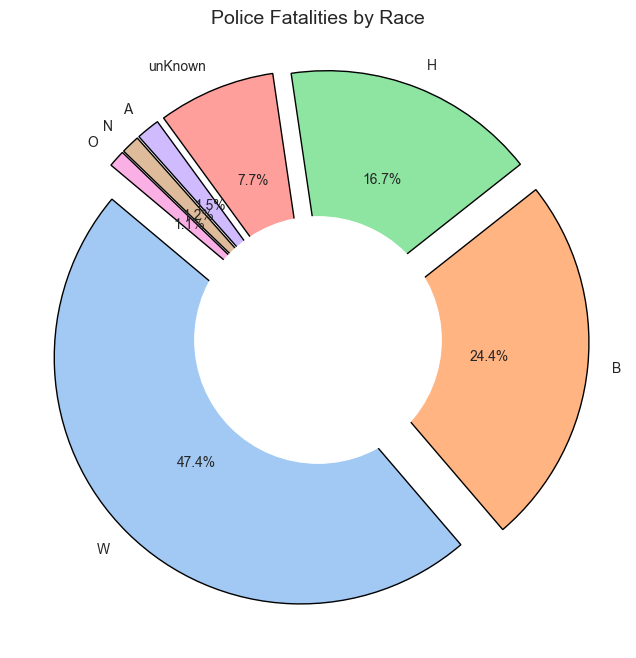

In [116]:
# 색상 팔레트 적용 (Seaborn pastel 스타일 사용)
colors = sns.color_palette("pastel", len(race_death_counts))

# 모든 인종 강조 (explode 값을 0.1로 설정)
explode = [0.1] * len(race_death_counts)  # 모든 조각을 약간 분리하여 강조

# 도넛 차트 생성
fig, ax = plt.subplots(figsize=(8, 8))  # 그래프 크기 설정 (가로 8, 세로 8)

# 원형 차트(도넛 차트) 생성
# wedges
## 파이 차트의 각 조각(부분) 을 나타내는 패치 객체의 리스트.
## 이를 통해 개별 조각을 조작할 수 있음 (예: 색상 변경, 크기 조정).
## wedges[i] 를 사용하여 특정 조각만 강조하거나 스타일을 변경할 수 있음.

# texts
## 각 조각에 표시되는 레이블(텍스트) 객체들의 리스트.
## labels=race_death_counts.index를 통해 추가된 인종명(W, B, H 등)이 포함됨.
## texts[i].set_fontsize(10)처럼 글꼴 크기 조절 가능.

# autotexts
## autopct="%1.1f%%" 옵션을 통해 추가된 자동 백분율 텍스트 객체 리스트.
## autotexts[i].set_color("white")처럼 색상이나 크기 조절 가능.

wedges, texts, autotexts = ax.pie(
    race_death_counts,  # 인종별 사망자 수 데이터
    labels=race_death_counts.index,  # 각 인종의 레이블 (W, B, H, 등)
    autopct="%1.1f%%",  # 각 조각에 백분율(%) 표시 (소수점 1자리까지)
    colors=colors,  # Seaborn pastel 컬러 적용
    explode=explode,  # 모든 인종 강조 (조각을 분리하여 강조 효과)
    startangle=140,  # 차트 시작 각도 (140도로 회전하여 가독성 향상)
    wedgeprops={"edgecolor": "black"}  # 조각 테두리 색상을 검정색으로 설정
)

# 도넛 차트로 만들기 (중앙 원 추가)
center_circle = plt.Circle((0, 0), 0.5, fc="white")  # 중심에 흰색 원을 추가하여 도넛 모양 구현
fig.gca().add_artist(center_circle)  # 차트에 중심 원 추가

# 그래프 제목 설정
plt.title("Police Fatalities by Race", fontsize=14)  # 제목 추가 (폰트 크기 14)

# 그래프 표시
plt.show()  # 최종적으로 그래프 출력

# 남성과 여성의 총 사망자 수 비교 차트 생성

- **남성과 여성의 사망자 수 차이**를 비교하는 차트를 생성
- 💡 `df_fatalities` 데이터를 활용하여 남성 사망자가 여성보다 얼마나 많은지 나타냄

In [117]:
# 성별에 따른 사망자 수 계산
gender_death_counts = df_fatalities["gender"].value_counts()
print(gender_death_counts)

gender
M    2428
F     107
Name: count, dtype: int64


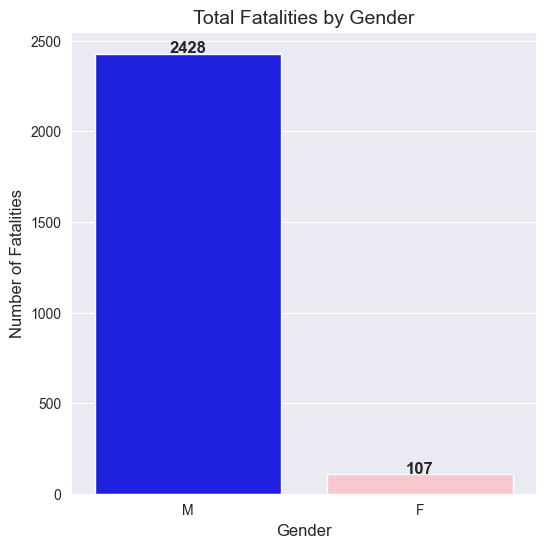

In [120]:
# 그래프 크기 설정
plt.figure(figsize=(6, 6))

# 성별 사망자 수 막대 그래프
sns.barplot(
    x=gender_death_counts.index,  # 성별 (M, F)
    y=gender_death_counts.values,  # 사망자 수
    hue=gender_death_counts.index,  # hue 추가 (데이터 구분)
    palette={"M": "blue", "F": "pink"}  # 성별 색상 지정
)

# 제목 & 레이블 추가
plt.title("Total Fatalities by Gender", fontsize=14)  # 그래프 제목
plt.xlabel("Gender", fontsize=12)  # X축 제목
plt.ylabel("Number of Fatalities", fontsize=12)  # Y축 제목

# 수치 라벨 표시 (막대 위에 값 추가)
for index, value in enumerate(gender_death_counts.values):
    plt.text(index, value + 5, str(value), ha="center", fontsize=12, fontweight="bold")

# 그래프 출력
plt.show()

# 연령 및 사망 유형을 나타내는 박스 플롯 생성

- 남성과 여성의 **연령(Age)** 및 **사망 유형(Manner of Death)** 을 나타내는 **박스 플롯(Box Plot)** 을 생성
- 💡 `df_fatalities` 데이터를 사용하여 성별(Gender)별로 데이터를 구분
- 남성과 여성 간에 사망 유형에 차이가 있는지 분석

In [122]:
## 문자열을 숫자로 변경
df_fatalities["age"] = pd.to_numeric(df_fatalities["age"], errors="coerce")
## 나이별 사망치 확인
age_death_counts = df_fatalities["age"].value_counts()
## 디버깅 확인
print(age_death_counts)

age
25.00    103
36.00     91
31.00     85
29.00     83
24.00     83
        ... 
80.00      1
14.00      1
13.00      1
91.00      1
79.00      1
Name: count, Length: 73, dtype: int64


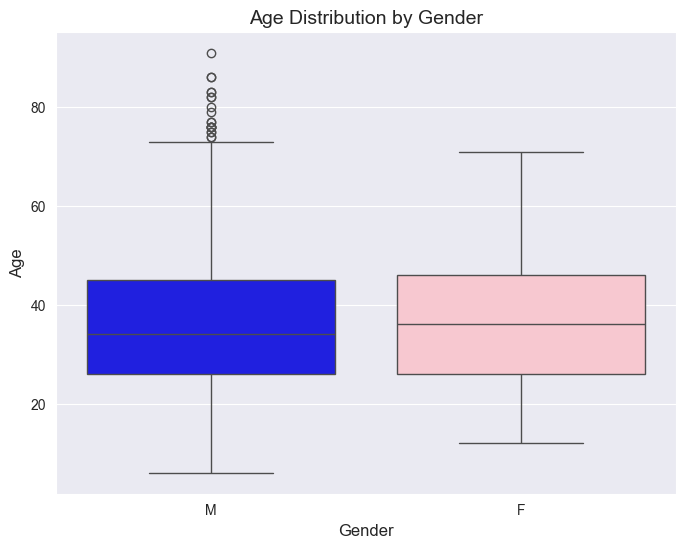

In [128]:
# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 박스 플롯 생성
sns.boxplot(
    data=df_fatalities,
    x="gender",  # 성별 (남성, 여성)
    y="age",  # 연령 분포
    hue="gender",  # 성별 그룹화 추가
    palette={"M": "blue", "F": "pink"},
    legend=False  # 범례 비활성화 (경고 해결)
)

# 그래프 제목 및 레이블 설정
plt.title("Age Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)

# 그래프 표시
plt.show()

- 남성과 여성의 연령 분포 중앙값은 비슷하며, 대체로 30~50대가 가장 많이 분포되어 있음.
- 남성의 경우 이상치(고령자)가 더 많아 보이며, 연령 분포가 조금 더 넓게 퍼져 있음.
- 여성은 전체적으로 더 균일한 연령 분포를 보이지만, 일부 고령층 이상치가 포함되어 있음.

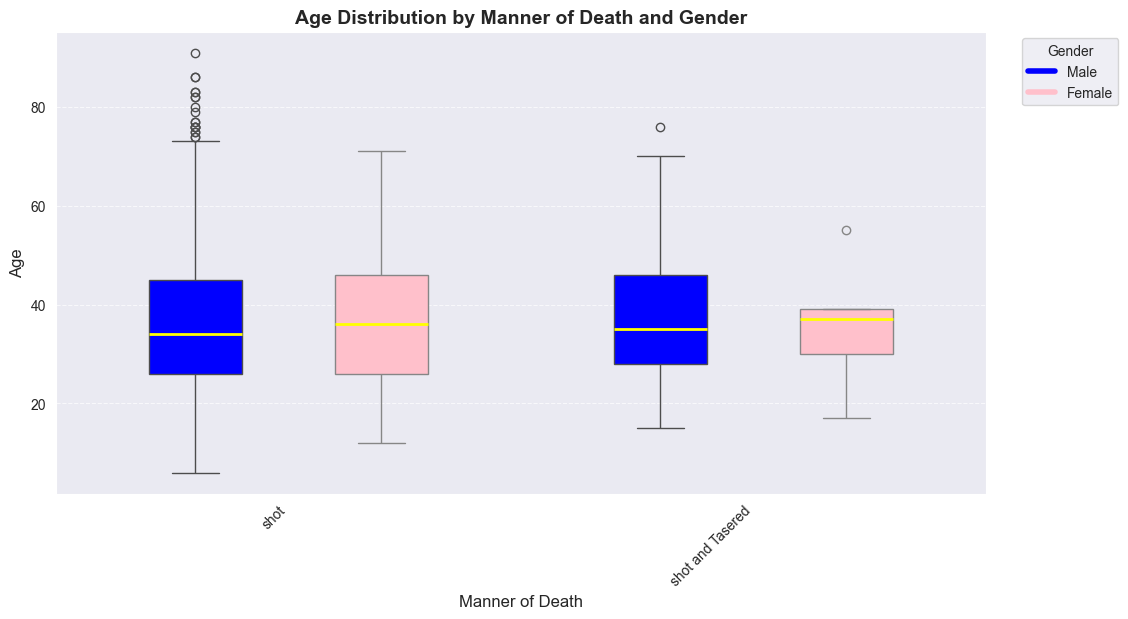

In [140]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))  # 가로 12, 세로 6 크기의 그래프 생성

# x축 위치를 수동으로 조정하기 위해 고유한 x값 리스트 생성
categories = df_fatalities["manner_of_death"].unique()  # 'manner_of_death' 컬럼에서 고유한 사망 유형 추출
x_values = np.arange(len(categories))  # 각 사망 유형을 x축 위치에 매핑

# 남성과 여성 박스 플롯을 개별적으로 그려서 x 위치 조정

# 남성(Male) 박스 플롯 생성 (파란색)
sns.boxplot(
    data=df_fatalities[df_fatalities["gender"] == "M"],  # 성별이 'M'인 데이터만 사용
    x=df_fatalities[df_fatalities["gender"] == "M"]["manner_of_death"],  # x축: 사망 유형
    y=df_fatalities[df_fatalities["gender"] == "M"]["age"],  # y축: 연령
    color="blue",  # 색상 지정 (남성 = 파란색)
    width=0.2,  # 박스 너비 조정 (너무 넓으면 겹침)
    boxprops={"facecolor": "blue"},  # 박스 내부 색상
    medianprops={"color": "yellow", "linewidth": 2},  # 중앙값 선 스타일 (노란색, 두께 2)
    positions=x_values - 0.2  # 남성 박스를 왼쪽으로 이동하여 분리
)

# 여성(Female) 박스 플롯 생성 (핑크색)
sns.boxplot(
    data=df_fatalities[df_fatalities["gender"] == "F"],  # 성별이 'F'인 데이터만 사용
    x=df_fatalities[df_fatalities["gender"] == "F"]["manner_of_death"],  # x축: 사망 유형
    y=df_fatalities[df_fatalities["gender"] == "F"]["age"],  # y축: 연령
    color="pink",  # 색상 지정 (여성 = 핑크색)
    width=0.2,  # 박스 너비 조정 (너무 넓으면 겹침)
    boxprops={"facecolor": "pink"},  # 박스 내부 색상
    medianprops={"color": "yellow", "linewidth": 2},  # 중앙값 선 스타일 (노란색, 두께 2)
    positions=x_values + 0.2  # 여성 박스를 오른쪽으로 이동하여 분리
)

# x축 라벨을 새롭게 설정 (글자가 겹치지 않도록 조정)
plt.xticks(ticks=x_values, labels=categories, rotation=45, ha="right")

# 그래프 제목 및 축 레이블 설정
plt.title("Age Distribution by Manner of Death and Gender", fontsize=14, fontweight="bold")  # 그래프 제목
plt.xlabel("Manner of Death", fontsize=12)  # x축 제목
plt.ylabel("Age", fontsize=12)  # y축 제목

# y축 격자 추가 (가독성 향상)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # 점선 스타일, 투명도 조절

# 범례 추가 (남성 = 파란색, 여성 = 핑크색)
custom_legend = [
    Line2D([0], [0], color="blue", lw=4, label="Male"),  # 남성 범례 (파란색)
    Line2D([0], [0], color="pink", lw=4, label="Female"),  # 여성 범례 (핑크색)
]
plt.legend(handles=custom_legend, title="Gender", loc="upper right", bbox_to_anchor=(1.15, 1))  # 범례 위치 조정

# 그래프 출력
plt.show()


# 무기를 소지하고 있었는가?

- 경찰 총격 사건에서 **무기를 소지한 사람의 비율**을 분석
- 사망자가 소지한 **무기의 종류**(또는 무기를 소지하지 않았는지)를 나타내는 차트를 생성
- 특히 총기(Guns) 소지자와 비무장(Unarmed) 사망자의 수를 비교

In [142]:
# 무기 종류별 데이터 집계
armed_counts = df_fatalities["armed"].value_counts()
print(armed_counts)

armed
gun                        1398
knife                       373
vehicle                     177
unarmed                     171
undetermined                117
                           ... 
air conditioner               1
pole and knife                1
baseball bat and bottle       1
fireworks                     1
pen                           1
Name: count, Length: 69, dtype: int64


In [143]:
# Armed와 Unarmed로 단순화
df_fatalities["armed_status"] = df_fatalities["armed"].apply(lambda x: "Unarmed" if x == "unarmed" else "Armed")
# 무기 소지 여부 카운트
armed_status_counts = df_fatalities["armed_status"].value_counts()
print(armed_status_counts)

armed_status
Armed      2364
Unarmed     171
Name: count, dtype: int64


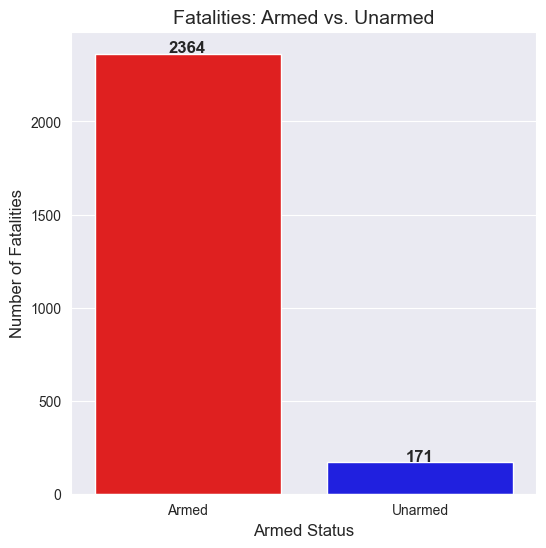

In [145]:
# 그래프 크기 설정
plt.figure(figsize=(6, 6))

# 바 차트 생성
sns.barplot(
    x=armed_status_counts.index,  # Armed vs. Unarmed
    y=armed_status_counts.values,
    hue=armed_status_counts.index,
    palette=["red", "blue"]  # 무기 소지자는 빨간색, 비무장은 파란색
)

# 제목 및 레이블 설정
plt.title("Fatalities: Armed vs. Unarmed", fontsize=14)
plt.xlabel("Armed Status", fontsize=12)
plt.ylabel("Number of Fatalities", fontsize=12)

# 값 표시
for index, value in enumerate(armed_status_counts.values):
    plt.text(index, value + 5, str(value), ha="center", fontsize=12, fontweight="bold")

# 그래프 출력
plt.show()

# 사망자의 연령 분석

- **25세 이하**의 사망자가 전체에서 차지하는 비율을 계산

In [146]:
young_death_ratio = (df_fatalities[df_fatalities["age"] <= 25].shape[0] / df_fatalities.shape[0]) * 100
print(f"25세 이하 사망자의 비율: {young_death_ratio:.2f}%")

25세 이하 사망자의 비율: 21.81%


- 경찰에 의해 사망한 사람들의 **연령 분포**를 나타내는
  **히스토그램(Histogram)과 커널 밀도 추정(KDE) 플롯**을 생성

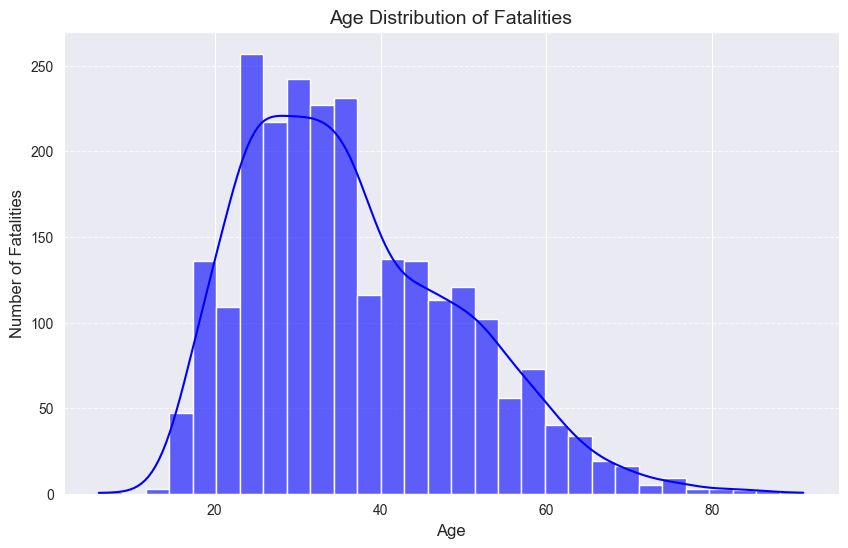

In [147]:
plt.figure(figsize=(10, 6))

# 히스토그램과 KDE (커널 밀도 추정) 함께 표시
sns.histplot(df_fatalities["age"], bins=30, kde=True, color="blue", alpha=0.6)

# 그래프 설정
plt.title("Age Distribution of Fatalities", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Fatalities", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

- 각 인종별로 개별 **KDE(Kernel Density Estimate) 플롯**을 생성, 인종에 따라 분포의 차이가 존재하는지 확인

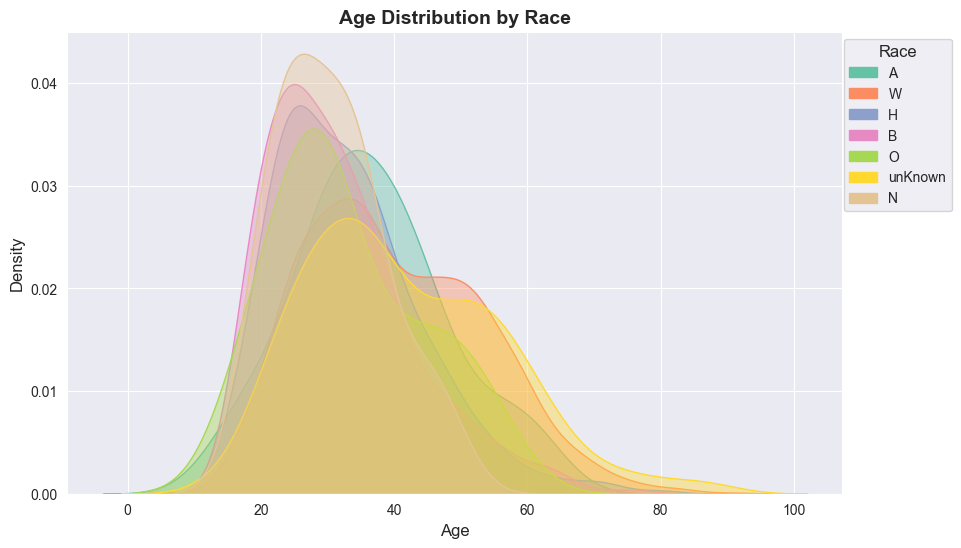

In [151]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))  # 가로 10, 세로 6 크기의 그래프 생성

# Seaborn 기본 색상 팔레트 가져오기 (Set2 팔레트 사용)
palette = sns.color_palette("Set2", n_colors=len(df_fatalities["race"].unique()))

# 인종별 KDE 플롯 생성 + 색상 지정
races = df_fatalities["race"].unique()  # 유니크한 인종 리스트 가져오기
race_colors = {}  # 인종별 색상을 저장할 딕셔너리

for i, race in enumerate(races):
    sns.kdeplot(
        data=df_fatalities[df_fatalities["race"] == race],  # 특정 인종의 데이터만 필터링
        x="age",  # x축: 연령
        fill=True,  # 색상 채우기
        alpha=0.4,  # 투명도 조절
        color=palette[i],  # 인종별 색상 적용
        label=race  # 범례에 표시될 이름
    )
    race_colors[race] = palette[i]  # 색상을 저장

# 그래프 제목 및 레이블 설정
plt.title("Age Distribution by Race", fontsize=14, fontweight="bold")  # 제목
plt.xlabel("Age", fontsize=12)  # x축 라벨
plt.ylabel("Density", fontsize=12)  # y축 라벨

# 커스텀 범례 생성 (인종별 색상 지정)
custom_legend = [mpatches.Patch(color=color, label=race) for race, color in race_colors.items()]
plt.legend(
    handles=custom_legend,  # 커스텀 범례 적용
    title="Race",  # 범례 제목
    title_fontsize=12,  # 범례 제목 크기
    fontsize=10,  # 범례 내부 폰트 크기
    loc="upper right",  # 우측 상단에 위치
    bbox_to_anchor=(1.15, 1)  # 그래프 바깥으로 살짝 이동
)

# 그래프 출력
plt.show()

# 인종별 사망자 수 비교 차트 생성

- 경찰에 의해 사망한 사람들의 **인종별 총 사망자 수**를 나타내는 차트를 생성

# 정신질환과 경찰 총격

- 경찰에 의해 사망한 사람들 중 **정신질환(Mental Illness)** 을 진단받은 사람이 차지하는 비율을 계산

# 경찰 총격 사건이 가장 많이 발생한 도시

- **경찰 총격 사건이 가장 많은 상위 10개 도시**를 나타내는 차트를 생성
- 어떤 도시가 가장 위험한가?

# 인종별 사망 비율 비교

- **상위 10개 도시에서 각 인종별 비율**을 분석
- 경찰 총격이 가장 많은 상위 10개 도시와 비교하여, 인종별 사망 비율이 어떻게 차이 나는지 분석

# 미국 각 주의 경찰 총격 사건을 나타내는 지도(Choropleth Map) 생성

- 경찰 총격 사건이 가장 많은 주(State)를 지도 위에 시각화
- 해당 주들은 높은 빈곤율을 가진 주와 일치하는가?

# 경찰 총격 사건의 시간에 따른 변화 분석

- 시간에 따른 **경찰 총격 사건의 추세(Trend)** 를 분석
- 데이터에서 특정한 경향이 보이는가?

# 에필로그

지금까지 데이터를 직접 분석해 보았습니다.
더 자세한 분석을 원한다면 [워싱턴 포스트의 분석](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)을 참고하세요.